## Name - Anmol Tripathi 


## Libraries

In [2]:
# General libraries
import math
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from tqdm import tqdm_notebook
from statistics import mean

# Model Making:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as stm # For Linear Regression using stats model


#Accuracy of Models:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


# Dsiplaying all columns of Dataframe
pd.set_option('display.max_columns', None)


## Data Cleaning

In [3]:
df = pd.read_csv("kc_house_train_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [4]:
# Dropping the Id Column

df = df.drop(['id'], axis = 1)

In [5]:
# Dropping the date Column

df = df.drop(['date'],axis = 1)

In [6]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


### Asking Questions to the Data

#### Q1) What are the data types of predictors and targets?

In [7]:
print(df.dtypes)

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


#### Q2) Do wavefront facing properties show better prices? Also, do they have more outliers?

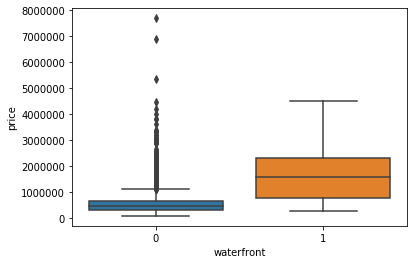

In [8]:
sns.boxplot(x="waterfront", y="price", data=df)

As we can clearly see that, properties having wavefront have more price in comparision to those not having wavefront. Also the properties having wavefront has very less/no outliers in comaprision to those not having wavefront.

#### Q3) The property which is being renovated is giving better price?

In [9]:
df[df['yr_renovated']==0].price.mean()

533156.7028907923

In [10]:
df.price.mean()

542833.5860055322

In [11]:
df[df['yr_renovated']!=0].price.mean()

757517.8812351543

As we can clearly see that, properties which are being renovated give a better mean of prices, thus generally having a higher price.

## Exploratory Data Anlaysis

In [12]:
df.info() #Information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 19 columns):
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: float64(5), int64(14)
memory usage: 1.4 MB


In [13]:
df.describe() #Statistical information of data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [14]:
#Missing Value in the dataset

df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Univariate Analysis

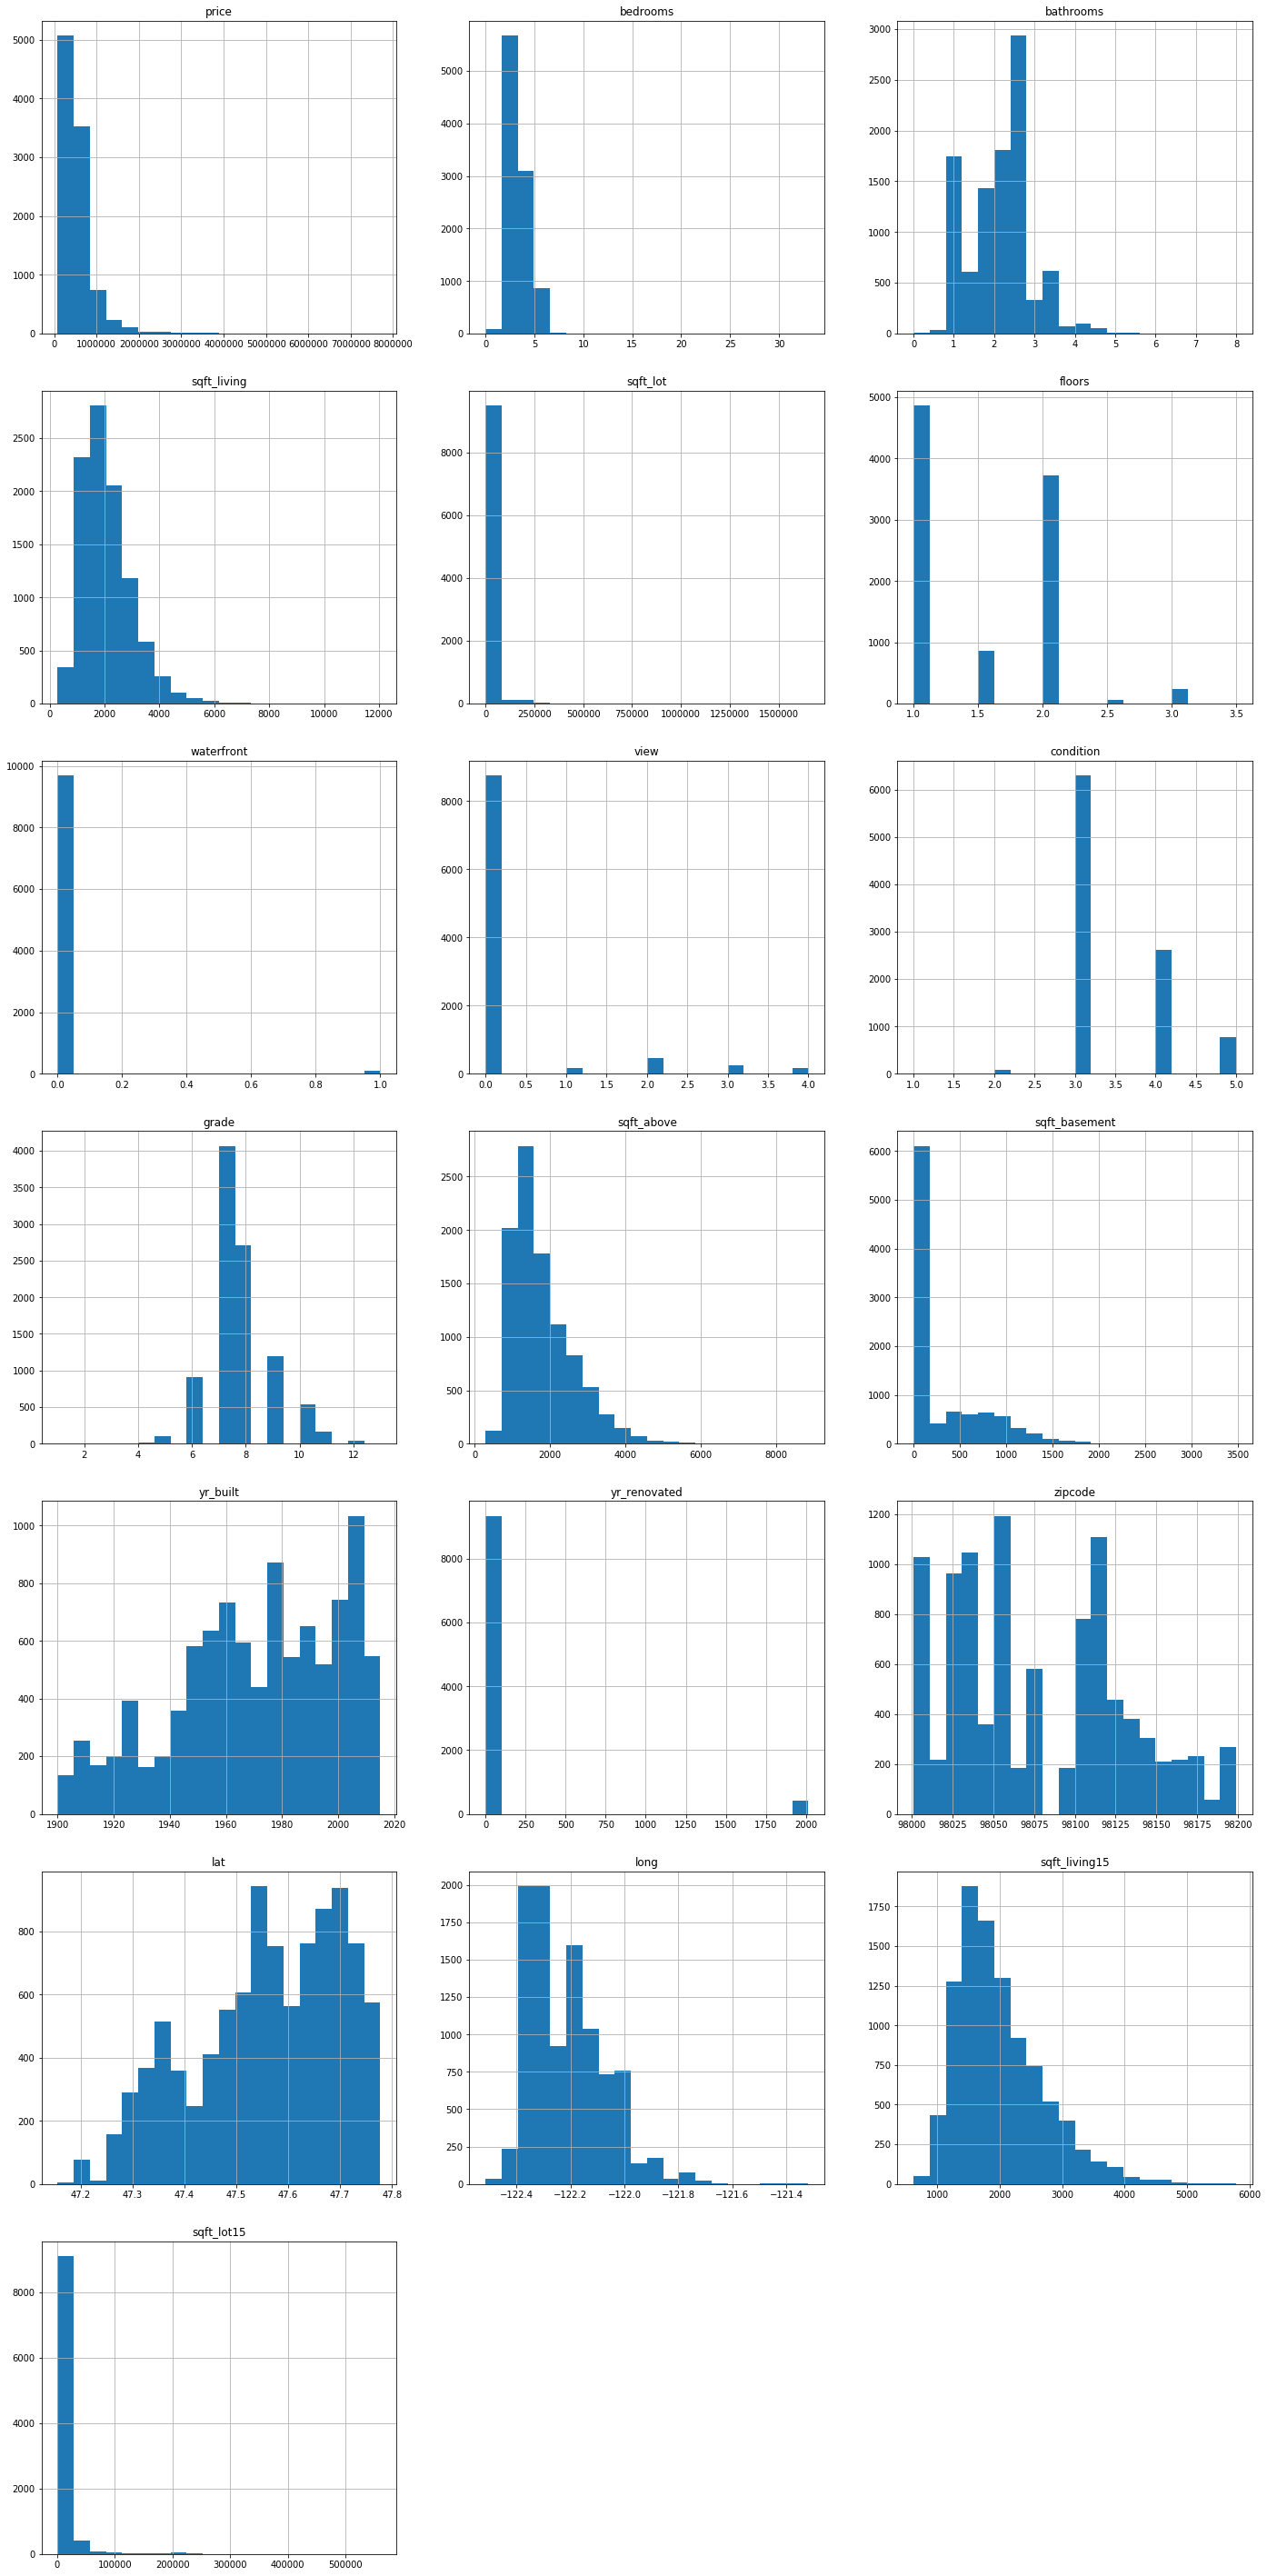

In [15]:
# Fequency Plots

fig = plt.figure(figsize=(20, 40))
for i in tqdm_notebook(range(len(df.columns)), desc = 'Generating Frequency Plots'):
    fig.add_subplot(np.ceil(len(df.columns)/3), 3, i+1)
    df.iloc[:, i].hist(bins=20)
    plt.title(df.columns[i])
    fig.tight_layout(pad=3.0)
plt.show();

### Bivariat Analysis

In [16]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,1230000.0,4,4.5,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [17]:
plotter_df = df.drop(['sqft_living15', 'sqft_lot15', 'lat', 'long', 'sqft_living', 
                          'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)

In [18]:
plotter_df

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,604000.0,4,3.00,1.0,0,0,5,7
1,1230000.0,4,4.50,1.0,0,0,3,11
2,468000.0,2,1.00,1.0,0,0,4,7
3,310000.0,3,1.00,1.5,0,0,4,7
4,400000.0,3,1.75,1.0,0,0,4,7
...,...,...,...,...,...,...,...,...
9756,429000.0,3,2.00,3.0,0,0,3,8
9757,610685.0,4,2.50,2.0,0,0,3,9
9758,1010000.0,4,3.50,2.0,0,0,3,9
9759,402101.0,2,0.75,2.0,0,0,3,7


In [19]:
def groupBarPlotter(dataset):
    """
    This function will create bar plot for each column in the dataset with price column
    """
    fig = plt.figure(figsize=(20, 40))
    for i in tqdm_notebook(range(len(dataset.columns)), desc = 'Generating Group Plots'):
        if not dataset.columns[i] == 'price':
            groups = dataset.groupby(dataset.columns[i])['price'].mean()
            fig.add_subplot(np.ceil(len(dataset.columns)/2), 2, i)
            plt.xlabel('price')
            groups.plot.barh()
            fig.tight_layout(pad=3.0)

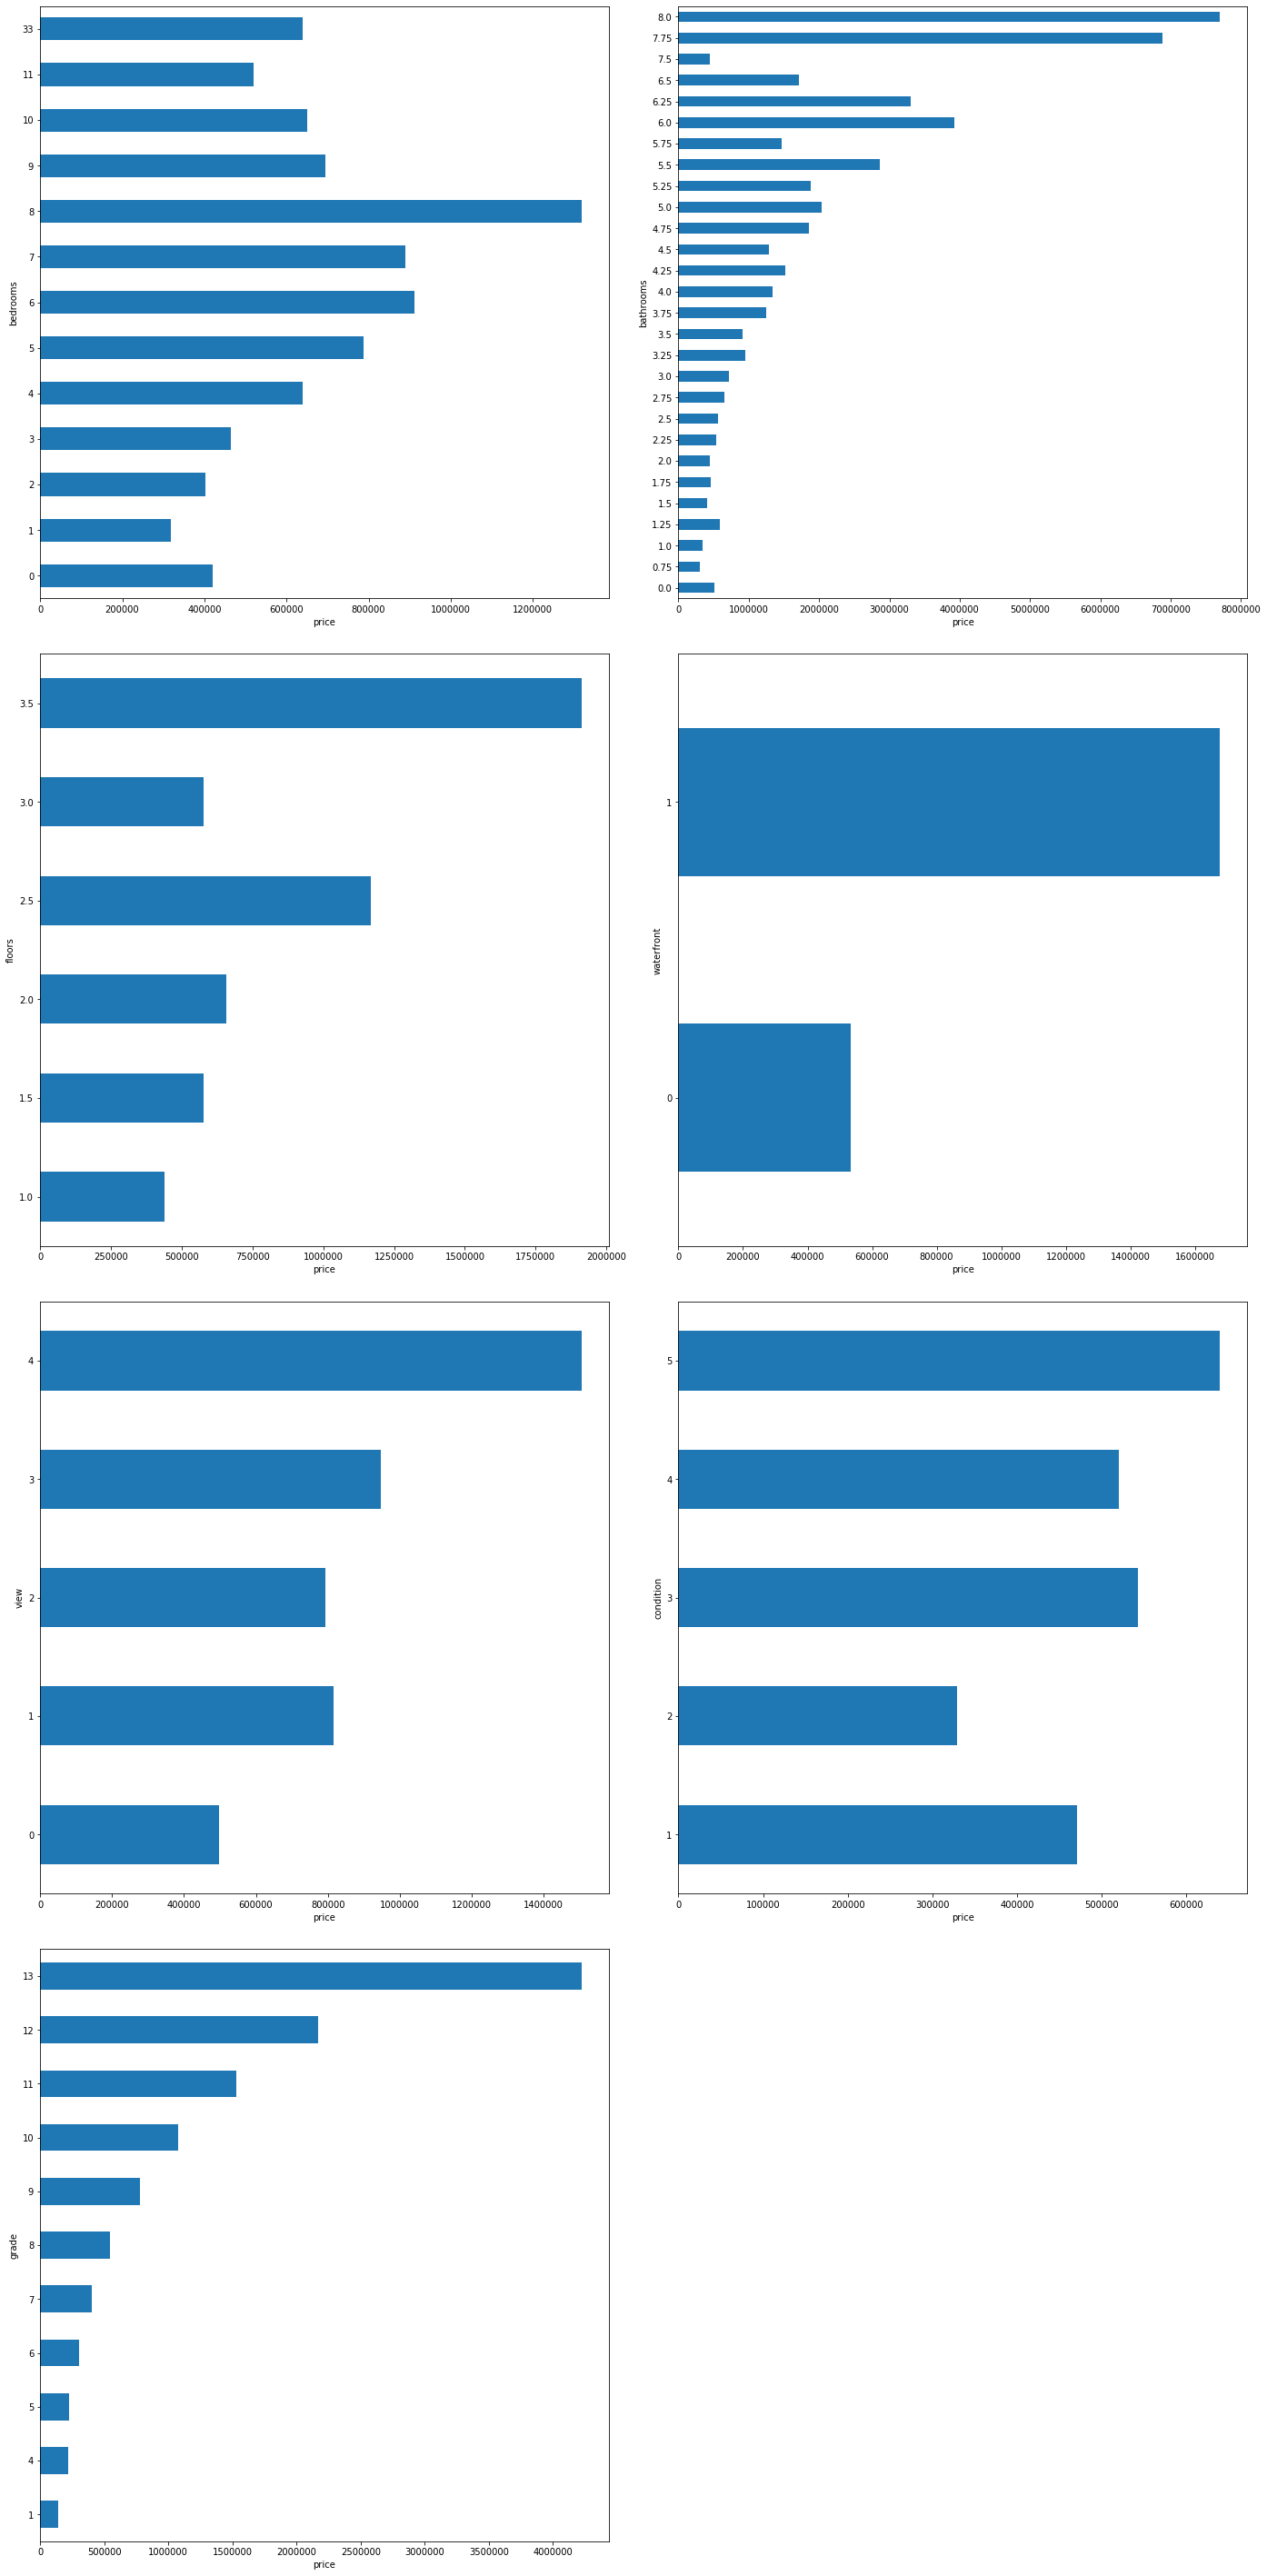

In [20]:
# Bar plot wrt Price

groupBarPlotter(plotter_df)

In [21]:
regplot_list = ['sqft_living15', 'sqft_lot15', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] # continuos data

### Plotting different Continuous data columns wrt Price. This will show general trend of Price with increasing values of these Columns data. It will also show a scatter map of the Column wrt Price.

(0, 8086305.179394524)

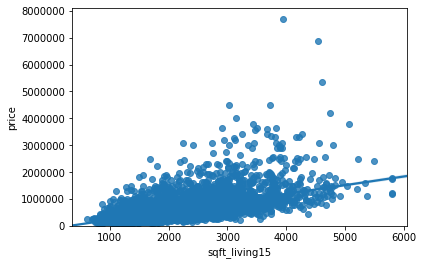

In [22]:
sns.regplot(x="sqft_living15", y="price", data=df)
plt.ylim(0,)

(0, 8081906.220528513)

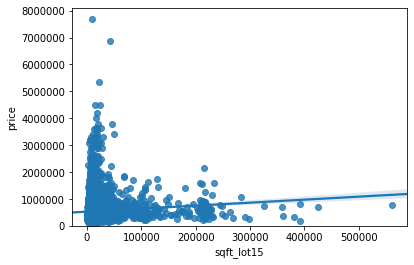

In [23]:
sns.regplot(x="sqft_lot15", y="price", data=df)
plt.ylim(0,)

(0, 8095122.752385799)

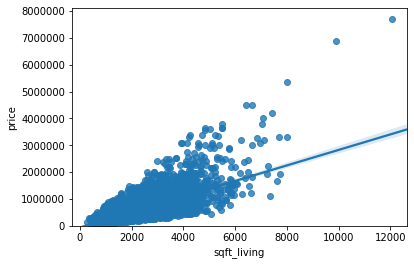

In [24]:
sns.regplot(x="sqft_living", y="price", data=df)
plt.ylim(0,)

(0, 8081906.220528513)

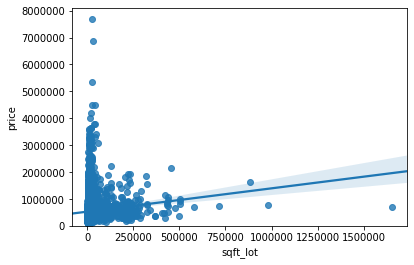

In [25]:
sns.regplot(x="sqft_lot", y="price", data=df)
plt.ylim(0,)

(0, 8087330.0957387285)

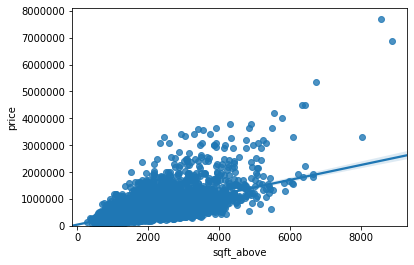

In [26]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

(0, 8081906.220528513)

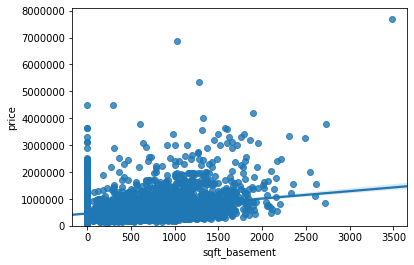

In [27]:
sns.regplot(x="sqft_basement", y="price", data=df)
plt.ylim(0,)

(0, 8081906.220528513)

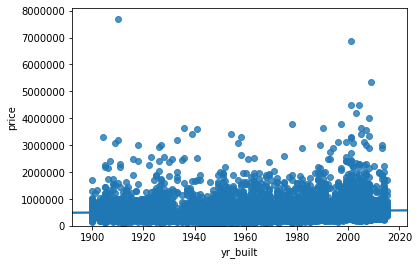

In [28]:
sns.regplot(x="yr_built", y="price", data=df)
plt.ylim(0,)

(0, 8081906.220528513)

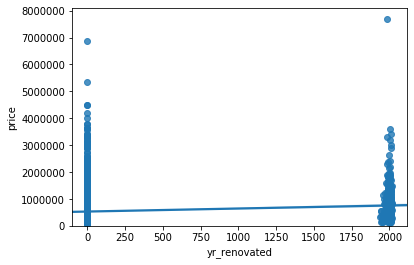

In [29]:
sns.regplot(x="yr_renovated", y="price", data=df)
plt.ylim(0,)

### Heatmap of correlation between each one variable with another variable ( Multivariate Analysis)

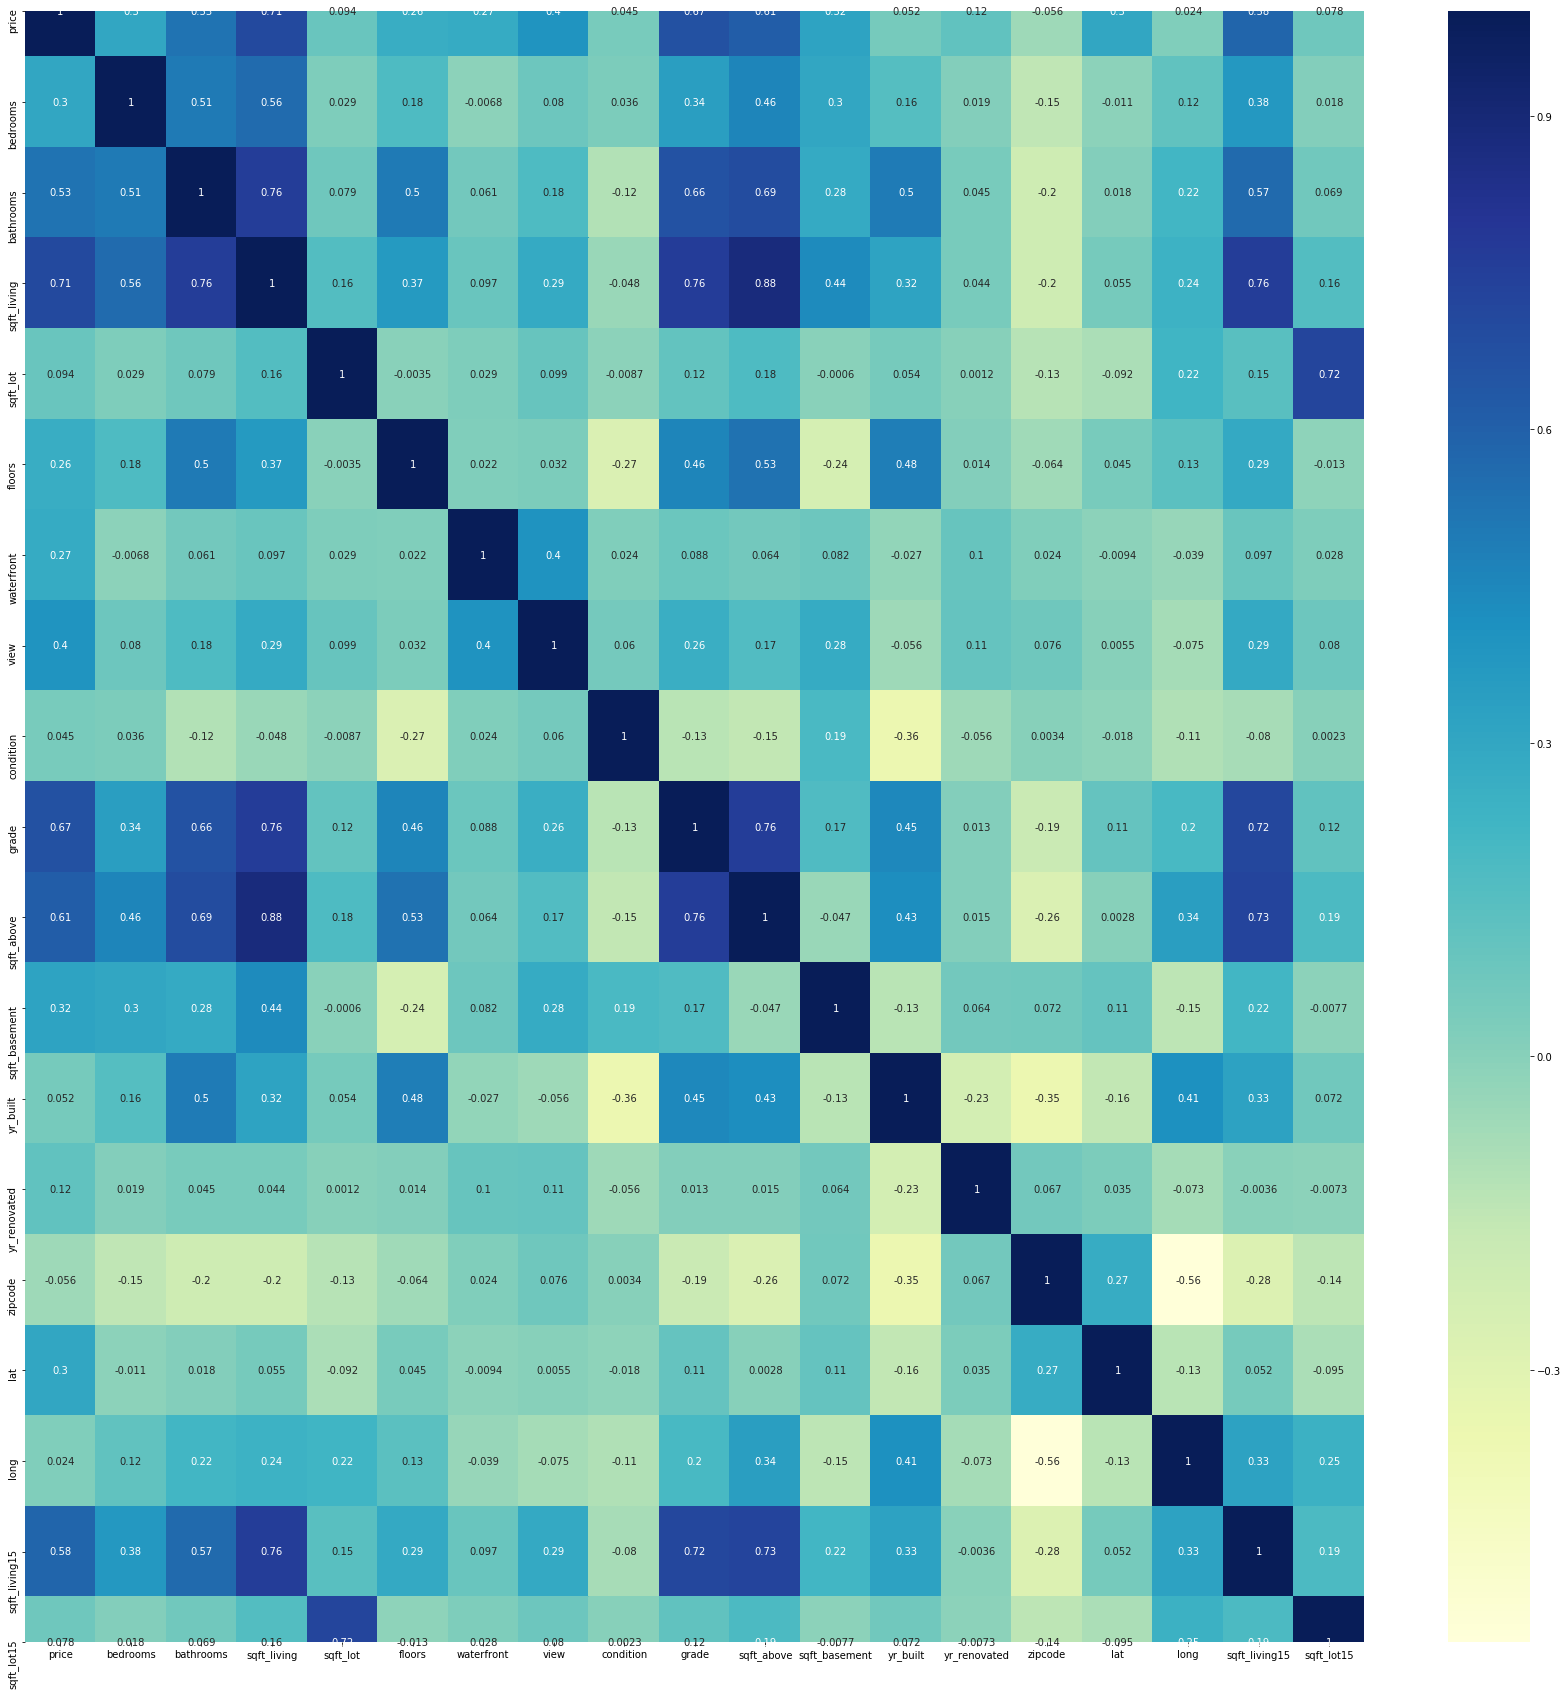

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [31]:
df_price_correlation = df.drop("price", axis=1).apply(lambda x: x.corr(df.price)) # Getting correlation of every predictor with respect to the price

In [32]:
df_price_correlation = df_price_correlation.abs().sort_values(ascending = False)
df_price_correlation

sqft_living      0.705044
grade            0.665594
sqft_above       0.611450
sqft_living15    0.584829
bathrooms        0.527512
view             0.399711
sqft_basement    0.322369
bedrooms         0.300777
lat              0.299191
waterfront       0.274953
floors           0.262955
yr_renovated     0.120439
sqft_lot         0.094146
sqft_lot15       0.077960
zipcode          0.055619
yr_built         0.051737
condition        0.044754
long             0.023718
dtype: float64

<BarContainer object of 18 artists>

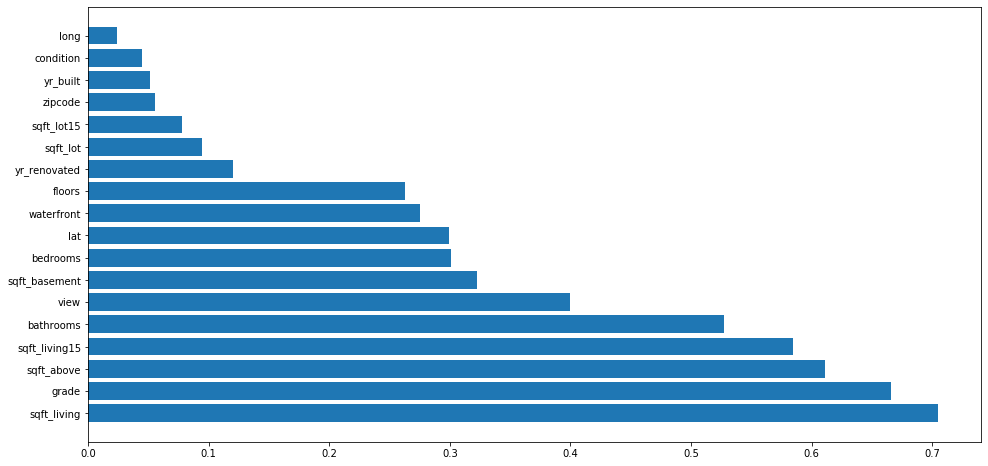

In [33]:
fig = plt.figure(figsize = (16, 8)) #Correlation of each variable with price

plt.barh(df_price_correlation.index.values.tolist(),df_price_correlation.values.tolist())

## Fitting, Predicting and Testing the model on orignal data

In [34]:
X1 = df.drop(['price'],axis = 1)

In [35]:
y1 = df['price']

In [36]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3) # performing train-test split

In [37]:
lr2 = LinearRegression()
lr2.fit(X1_train,y1_train) # Fitting regression model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred1 = lr2.predict(X1_test) # Predicting price using test data
y_pred1 

array([ 451964.41276413,  216780.3342908 , 1239715.58037932, ...,
        503656.51033059,  341643.46015227, 1122430.88097049])

In [39]:
r2_score(y1_test,y_pred1)

0.7036772199743593

## Linear Regression Using Stats Model

In [40]:
X1 = stm.add_constant(X1)
X1

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,1.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,1.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,1.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,1.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,1.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,1.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,1.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [41]:
mod = stm.OLS(y1,X1).fit()

In [42]:
mod.params

const            7.810610e+06
bedrooms        -3.363888e+04
bathrooms        4.477403e+04
sqft_living      1.153804e+02
sqft_lot         1.572246e-01
floors           4.288492e+03
waterfront       6.136853e+05
view             5.159147e+04
condition        2.499401e+04
grade            9.763349e+04
sqft_above       7.851588e+01
sqft_basement    3.686929e+01
yr_built        -2.818690e+03
yr_renovated     1.323390e+01
zipcode         -5.979563e+02
lat              5.952170e+05
long            -2.239741e+05
sqft_living15    1.090278e+01
sqft_lot15      -3.471632e-01
dtype: float64

In [43]:
mod.summary() # sqft_living, floors, sqft_above, sqft_basement

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1338.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:42:50   Log-Likelihood:            -1.3338e+05
No. Observations:                9761   AIC:                         2.668e+05
Df Residuals:                    9743   BIC:                         2.669e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.811e+06   4.54e+06      1.719      0.086    -1.1e+06    1.67e+07
bedrooms      -3.364e+04   2772.956    -12.131      0.000   -3.91e+04   -2.82e+04
bathrooms      4.477e+04   4951.393      9.043      0.000    3.51e+04    5.45e+04
sqft_living     115.3804      3.479     33.169      0.000     108.562     122.199
sqft_lot          0.1572      0.074      2.115      0.034       0.011       0.303
floors         4288.4920   5600.025      0.766      0.444   -6688.719    1.53e+04
waterfront     6.137e+05   2.53e+04     24.231      0.000    5.64e+05    6.63e+05
view           5.159e+04   3216.154     16.041      0.000    4.53e+04    5.79e+04
condition      2.499e+04   3626.141      6.893      0.000    1.79e+04    3.21e+04
grade          9.763e+04   3301.256     29.575      0.000    9.12e+04    1.04e+05
sqft_above       78.5159      3.437     22.846      0.000      71.779      85.253
sqft_basement    36.8693      4.072      9.053      0.000      28.886      44.852
yr_built      -2818.6900    111.786    -25.215      0.000   -3037.814   -2599.566
yr_renovated     13.2339      5.574      2.374      0.018       2.309      24.159
zipcode        -597.9563     51.074    -11.708      0.000    -698.072    -497.841
lat            5.952e+05   1.63e+04     36.407      0.000    5.63e+05    6.27e+05
long           -2.24e+05   2.02e+04    -11.085      0.000   -2.64e+05   -1.84e+05
sqft_living15    10.9028      5.304      2.056      0.040       0.507      21.299
sqft_lot15       -0.3472      0.116     -2.981      0.003      -0.575      -0.119
==============================================================================
Omnibus:                     8757.298   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1041742.602
Skew:                           3.832   Prob(JB):                         0.00
Kurtosis:                      53.027   Cond. No.                     1.55e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.12e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Feature Engineering 

### Dropping the columns that are least correlated

In [44]:
X = df.drop(['zipcode','lat','long','price'], axis = 1)

In [45]:
y = df['price']

In [46]:
y

0        604000.0
1       1230000.0
2        468000.0
3        310000.0
4        400000.0
          ...    
9756     429000.0
9757     610685.0
9758    1010000.0
9759     402101.0
9760     325000.0
Name: price, Length: 9761, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # performing train-test split

In [48]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train) # Fitting regression model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred = lr1.predict(X_test) # Predicting price using test data
y_pred 

array([898321.44169912, 787594.03841018, 790819.36592014, ...,
       145443.74542155, 979734.3785673 , 413907.17363621])

In [50]:
r2_score(y_test,y_pred) # As we can see, the r_2 score has rather decreased, so we will not consider this option 

0.6411703314970866

### Creating Dummy Variables for zipcode

In [129]:
df_c = pd.get_dummies(df, columns = ['zipcode']) # Getting dummies for zipcode

In [130]:
X2 = df_c.drop(['price'],axis = 1)

In [131]:
y2 = df_c['price']

In [132]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3) # performing train-test split

In [133]:
lr3 = LinearRegression()
lr3.fit(X2_train,y2_train) # Fitting regression model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
y_pred2 = lr3.predict(X2_test) # Predicting price using test data
y_pred2 

array([600184.36884278, 404469.94555015,  57837.51307324, ...,
       575574.21363769, 407415.99592691, 725066.86886333])

In [135]:
r2_score(y2_test,y_pred2)  # As we can see, creating zipcode as a dummy variable increases the R2 score significantly to 0.8100

0.8100162153243192

### Removing variables with high VIF factor

In [138]:
X3 = df.drop(['sqft_above','sqft_basement','sqft_living','price'],axis = 1) # Refer to Assumptions of Linear Regression part

In [139]:
y3 = df['price']

In [140]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3) # performing train-test split

In [141]:
lr4 = LinearRegression()
lr4.fit(X3_train,y3_train) # Fitting regression model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
y_pred3 = lr4.predict(X3_test) # Predicting price using test data
y_pred3 

array([ 139657.7846465 ,  -36451.23961335, 1097534.74426176, ...,
        468354.48024268,  414821.58045406,  517654.73412666])

In [144]:
r2_score(y3_test,y_pred3)    # As we can see, it reduces the R2 score, so it's not the right method to inculcate.

0.6377339879856931

## Checking the Assumptions of Linear Regression

### Checking for Linear Relationship

In [94]:
plt.rcParams["figure.figsize"] = (15,20)

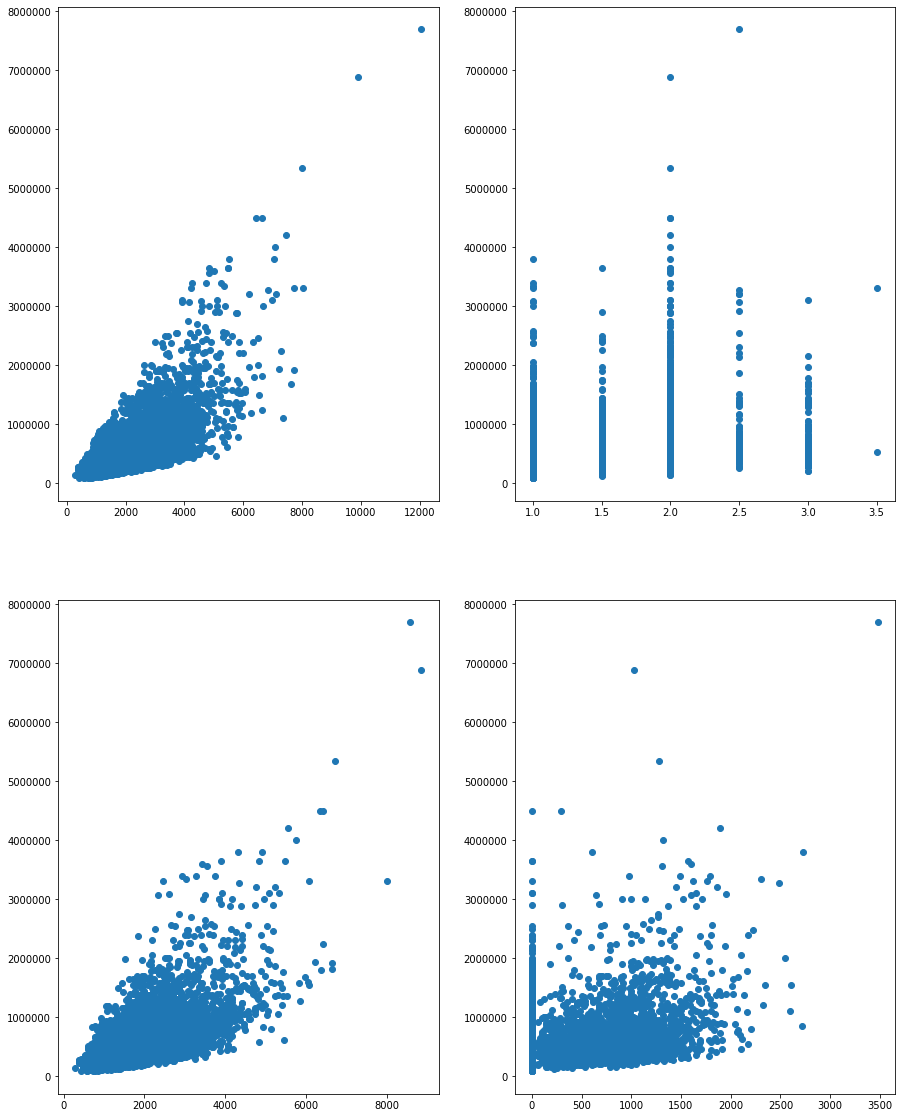

In [105]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.scatter(X1['sqft_living'],y1) 
ax2.scatter(X1['floors'],y1) 
ax3.scatter(X1['sqft_above'],y1) 
ax4.scatter(X1['sqft_basement'],y1) 

Note : As we can see from above graphs that, sqft_above and sqft_living has a somewhat linear relationship with price, while floors and sqft_basement doesn't. They are the variables with the highest coefficient values.

### Checking For Multicollinearity 

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X1.columns[i]: variance_inflation_factor(X1.values,i) for i in range(1,X1.shape[1])}
# As we can see, the vif factor of sqft_above, sqft_basement, sqft_living is very high, so we can remove them. Also most of the variables have a vif factor below 5, so most of the variables have low multicollinearity 

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


{'bedrooms': 1.5981962620633603,
 'bathrooms': 3.3073138107426012,
 'sqft_living': inf,
 'sqft_lot': 2.1200192638751765,
 'floors': 2.0012048752286544,
 'waterfront': 1.2034603396411299,
 'view': 1.445979319966248,
 'condition': 1.253211784772362,
 'grade': 3.432925950183028,
 'sqft_above': inf,
 'sqft_basement': inf,
 'yr_built': 2.4060424796964104,
 'yr_renovated': 1.1498584454786855,
 'zipcode': 1.6628455698519895,
 'lat': 1.183748072351516,
 'long': 1.7993738134267643,
 'sqft_living15': 2.9923849845939765,
 'sqft_lot15': 2.147968548030492}

In [52]:
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
  
print(vif_data)

          feature           VIF
0           const  4.651142e+06
1        bedrooms  1.598196e+00
2       bathrooms  3.307314e+00
3     sqft_living           inf
4        sqft_lot  2.120019e+00
5          floors  2.001205e+00
6      waterfront  1.203460e+00
7            view  1.445979e+00
8       condition  1.253212e+00
9           grade  3.432926e+00
10     sqft_above           inf
11  sqft_basement           inf
12       yr_built  2.406042e+00
13   yr_renovated  1.149858e+00
14        zipcode  1.662846e+00
15            lat  1.183748e+00
16           long  1.799374e+00
17  sqft_living15  2.992385e+00
18     sqft_lot15  2.147969e+00


### Checking for Homoscedasticity - constant variance

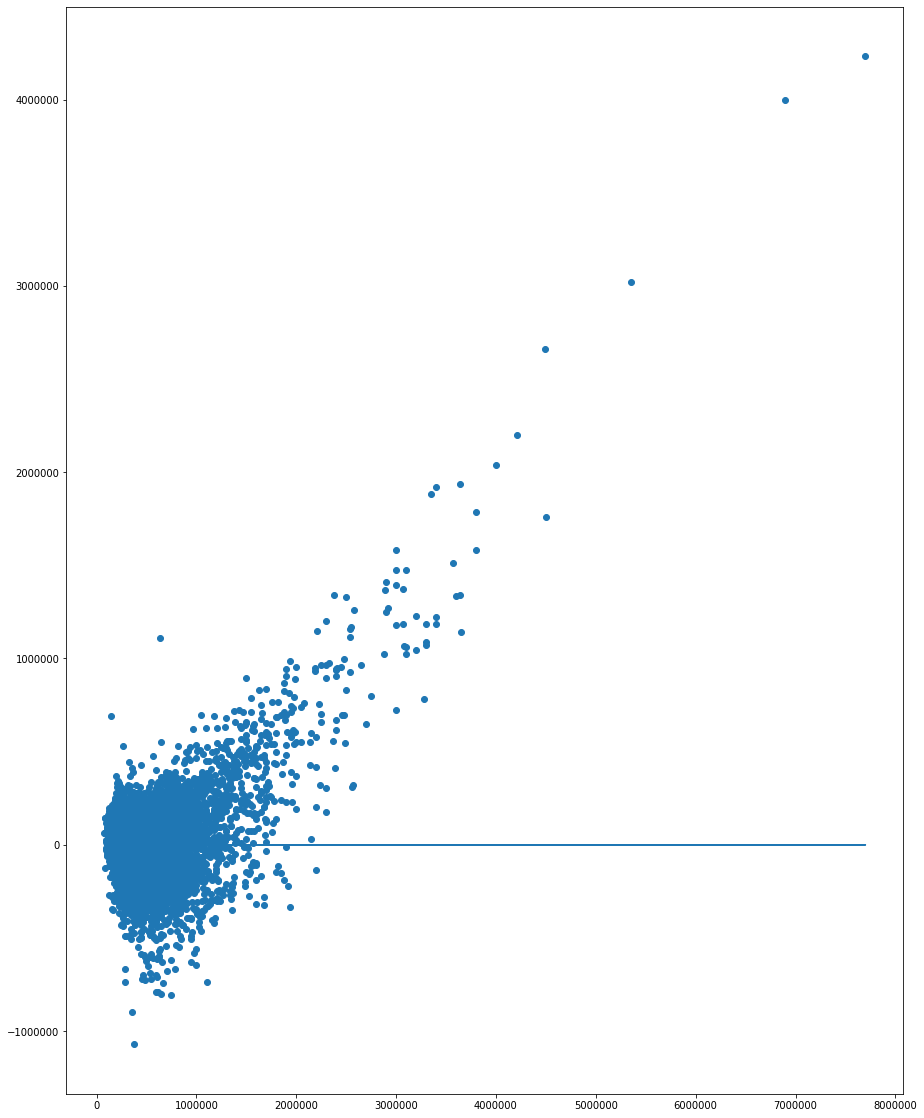

In [146]:
residuals = mod.resid
plt.scatter(y1,residuals)
plt.plot(y1,[0]*len(y1))

### Checking of No Autocorrelation of Errors

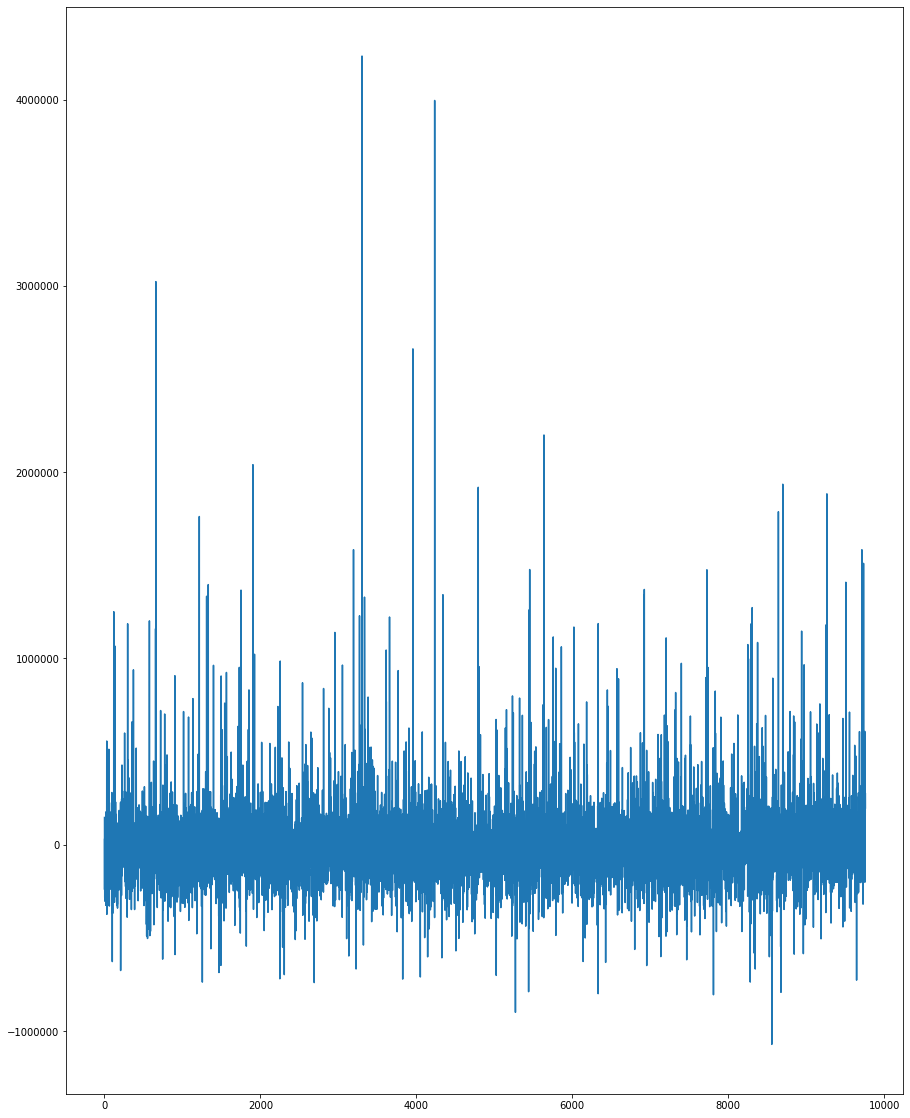

In [147]:
plt.plot(residuals.index,residuals) # As we can see, there is not much pattern in the errors

### Checking normality of residuals

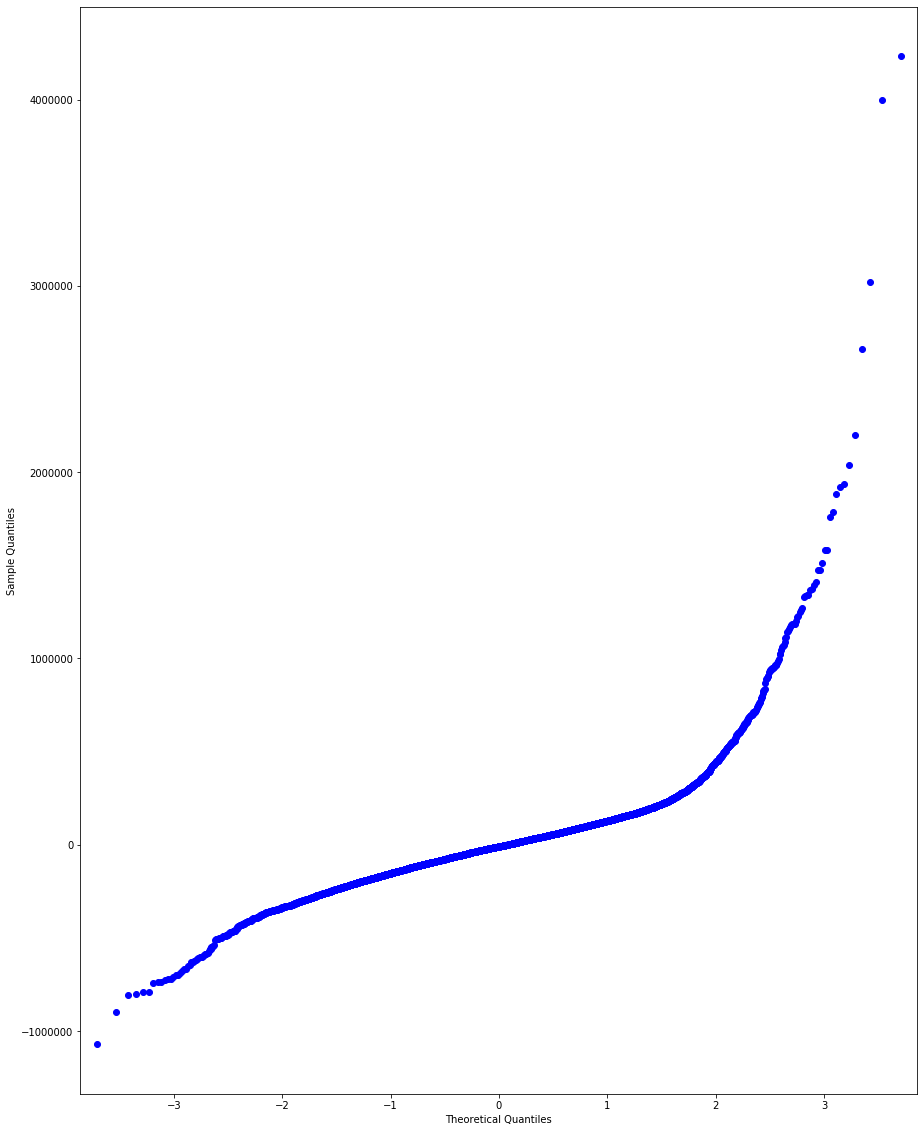

In [150]:
residuals = mod.resid
stm.qqplot(residuals)
plt.show()

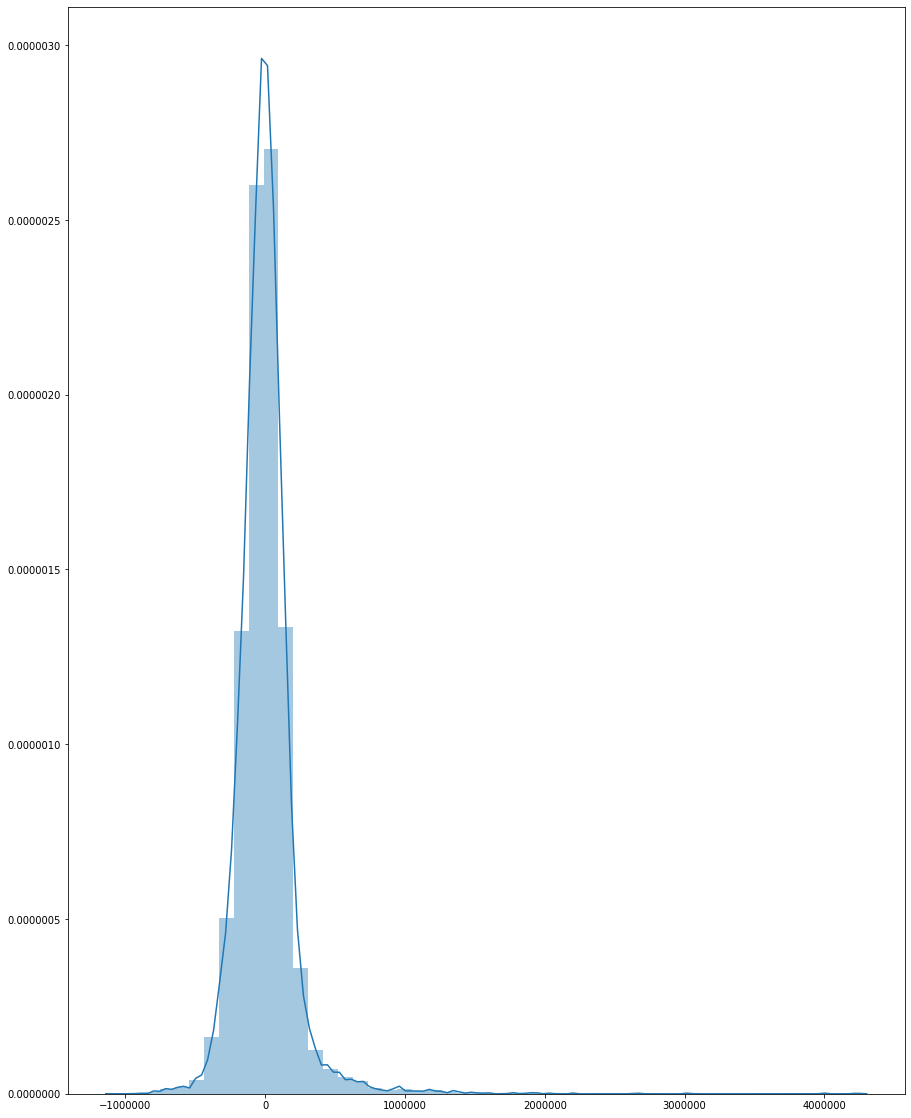

In [151]:
sns.distplot(residuals) # As we can see, the errors are normally distributed

### Checking the independence of observations

Note : All the observations seems to be independent of each other. There doesn't seem to be any kind of duplication.

### Conclusion

We can conclude that if we create dummy variables for zipcode, then we get the maximum R2 score. We get an increase of almost 11% in the R2 score, thus in such a situation, the model is considered to be the best.